In [42]:
import numpy as np
import pandas as pd

In [43]:
sentiment = pd.read_csv('情感文本.csv', encoding='latin1')
sentiment.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [44]:
sentiment.shape

(99989, 3)

In [45]:
del sentiment['ItemID']

In [46]:
sentiment.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [47]:
# 特征选择包里导入
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
print(X.toarray()) 

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [49]:
X = sentiment['SentimentText']
y = sentiment['Sentiment']

In [50]:
vect = CountVectorizer()
temp = vect.fit_transform(X)
vect.get_feature_names()

['00',
 '000',
 '0001t',
 '000martha',
 '001',
 '0010x0010',
 '0022',
 '007',
 '007heather007',
 '007hil',
 '007jbond',
 '007louiseob',
 '007peter',
 '00a',
 '00am',
 '00fieldsy',
 '00geneva',
 '00h',
 '00k',
 '00mathias',
 '00mony00',
 '00neji',
 '00pet00',
 '00pm',
 '00ps',
 '00seve',
 '00vicky00',
 '01',
 '01000101',
 '011',
 '011iver',
 '0130',
 '0132',
 '016578',
 '017',
 '01jamcon',
 '01movie',
 '01ps',
 '01theone',
 '02',
 '0205laura',
 '021',
 '0239',
 '0292070616',
 '02plane',
 '02sweetpea02',
 '03',
 '0309love',
 '03l',
 '03robin',
 '04',
 '0411247113',
 '0433963407',
 '044',
 '0448417513',
 '04pm',
 '04youenc',
 '05',
 '0546',
 '05jstone',
 '05pm',
 '06',
 '061004',
 '0631',
 '06atmfj',
 '06eleven',
 '06falloutgirl06',
 '07',
 '0700',
 '071',
 '07am',
 '07nick07',
 '07thking',
 '07yez',
 '08',
 '0811thereason',
 '083lxj',
 '087r9',
 '08erica09',
 '08fjw',
 '08h8a',
 '08home',
 '08sikid',
 '08zlk',
 '09',
 '09011',
 '090595',
 '093m3',
 '094459',
 '09aoc',
 '09casper',
 '09ch

In [51]:
temp.shape

(99989, 105849)

In [52]:
# 去停用词
vect = CountVectorizer(stop_words='english')  
temp = vect.fit_transform(X)
print(temp.shape)

(99989, 105545)


In [53]:
type(temp)

scipy.sparse.csr.csr_matrix

#### 在输出中，左边的括号中的第一个数字是文本的序号i，第2个数字是词的序号j，注意词的序号是基于所有的文档的。第三个数字就是词频。

In [54]:
print(temp)

  (0, 65401)	1
  (0, 21637)	1
  (0, 90341)	1
  (1, 98790)	1
  (1, 79881)	1
  (1, 81468)	1
  (1, 79327)	1
  (2, 1718)	1
  (2, 83053)	1
  (3, 1754)	1
  (3, 57602)	1
  (3, 73391)	1
  (3, 95799)	1
  (3, 279)	1
  (3, 59486)	1
  (3, 101111)	1
  (3, 67751)	1
  (3, 93726)	1
  (3, 70791)	2
  (3, 83054)	1
  (4, 96326)	1
  (4, 48290)	1
  (4, 33550)	1
  (4, 78881)	1
  (4, 97636)	1
  :	:
  (99984, 88827)	1
  (99984, 7019)	1
  (99984, 86633)	1
  (99984, 69721)	1
  (99984, 75878)	1
  (99985, 73694)	1
  (99985, 23185)	1
  (99985, 58224)	1
  (99985, 61372)	1
  (99985, 88853)	1
  (99985, 59924)	1
  (99985, 99594)	1
  (99985, 68897)	1
  (99985, 76192)	1
  (99985, 98019)	1
  (99986, 58223)	1
  (99986, 104183)	1
  (99986, 97748)	1
  (99987, 58225)	1
  (99987, 66652)	1
  (99987, 104506)	2
  (99987, 65633)	1
  (99988, 58226)	1
  (99988, 104506)	1
  (99988, 68001)	1


In [55]:
vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [56]:
# 过滤掉低于出现率低于0.05的词
vect = CountVectorizer(min_df=.05)
temp = vect.fit_transform(X)
print (temp.shape)

(99989, 31)


In [57]:
temp.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [58]:
vect = CountVectorizer(ngram_range=(1, 5))
temp = vect.fit_transform(X)
print(temp.shape)

(99989, 3219557)


In [59]:
vect.get_feature_names()[:15]

['00',
 '00 01',
 '00 01 minute',
 '00 01 minute after',
 '00 01 minute after applications',
 '00 10',
 '00 10 00',
 '00 56',
 '00 56 03',
 '00 56 03 beating',
 '00 56 03 beating my',
 '00 always',
 '00 always have',
 '00 always have such',
 '00 always have such warmth']

In [60]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

In [61]:
stemmer.stem('hello')

'hello'

In [62]:
stemmer.stem('interesting')

'interest'

In [63]:
stemmer.stem('interested')

'interest'

#### TF-IDF是一种统计方法，用以评估一个字词对于一个文件集或一个语料库中的其中一份文件的重要程度。字词的重要性随着它在文件中出现的次数成正比增加，但同时会随着它在语料库中出现的频率成反比下降。
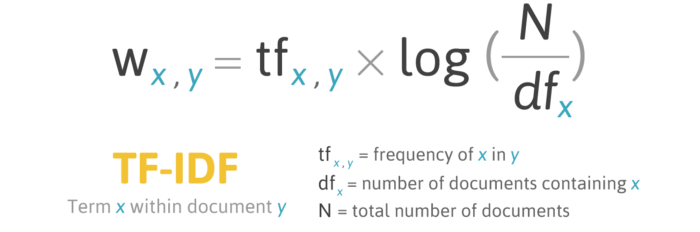

- tfidf的取值越大代表该词越重要
- tfidf的取值与tf成正比，与df成反比

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
X

0                             is so sad for my APL frie...
1                           I missed the New Moon trail...
2                                  omg its already 7:30 :O
3                  .. Omgaga. Im sooo  im gunna CRy. I'...
4                 i think mi bf is cheating on me!!!   ...
5                        or i just worry too much?        
6                       Juuuuuuuuuuuuuuuuussssst Chillin!!
7               Sunny Again        Work Tomorrow  :-|  ...
8              handed in my uniform today . i miss you ...
9                 hmmmm.... i wonder how she my number @-)
10                           I must think about positive..
11             thanks to all the haters up in my face a...
12                          this weekend has sucked so far
13                  jb isnt showing in australia any more!
14                                    ok thats it you win.
15           &lt;-------- This is the way i feel right ...
16           awhhe man.... I'm completely useless rt no.

In [65]:
vect = TfidfVectorizer()
temp = vect.fit_transform(X)
print (temp[0,:])

  (0, 71938)	0.20751393363509252
  (0, 93674)	0.22523369266874163
  (0, 90542)	0.3371941933510279
  (0, 65062)	0.2049763574474265
  (0, 80817)	0.2007897391947143
  (0, 21665)	0.7454662730740867
  (0, 65503)	0.39300895185119816


In [66]:
vect = CountVectorizer()
_ = vect.fit_transform(X)
print (_[0,:])



  (0, 65503)	1
  (0, 21665)	1
  (0, 80817)	1
  (0, 65062)	1
  (0, 90542)	1
  (0, 93674)	1
  (0, 71938)	1


In [67]:
print(type(_))

<class 'scipy.sparse.csr.csr_matrix'>


In [68]:
print(_)

  (0, 65503)	1
  (0, 21665)	1
  (0, 80817)	1
  (0, 65062)	1
  (0, 90542)	1
  (0, 93674)	1
  (0, 71938)	1
  (1, 99049)	1
  (1, 80032)	1
  (1, 81633)	1
  (1, 97552)	1
  (1, 79478)	1
  (2, 1718)	1
  (2, 14693)	1
  (2, 72089)	1
  (2, 83232)	1
  (3, 1754)	1
  (3, 83282)	1
  (3, 87411)	1
  (3, 57664)	1
  (3, 66440)	1
  (3, 73528)	1
  (3, 96026)	1
  (3, 102394)	1
  (3, 279)	1
  :	:
  (99985, 91505)	1
  (99985, 83854)	1
  (99985, 98522)	1
  (99985, 104998)	1
  (99985, 25403)	1
  (99985, 97552)	2
  (99985, 71938)	1
  (99986, 58286)	1
  (99986, 104481)	1
  (99986, 97996)	1
  (99986, 93674)	1
  (99987, 58288)	1
  (99987, 66760)	1
  (99987, 104804)	2
  (99987, 65738)	1
  (99987, 103563)	1
  (99987, 68082)	1
  (99987, 80078)	1
  (99987, 104998)	1
  (99987, 78448)	1
  (99988, 58289)	1
  (99988, 104804)	1
  (99988, 68111)	1
  (99988, 60585)	1
  (99988, 104998)	1


- 文档

doc1: [I, like, NLP]

doc2: [I, like, CS, and, like, NLP]


- 词袋模型

doc1: [1, 0, 1, 1, 0]

doc2: [1, 1, 2, 1, 1] 


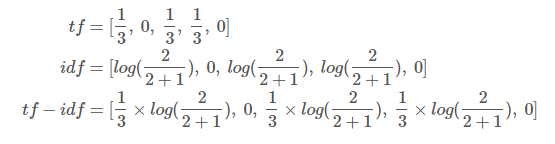

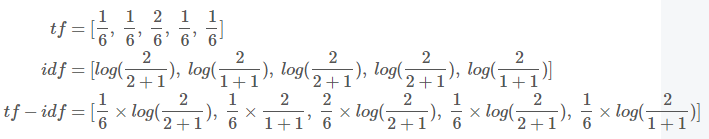

In [69]:
y.value_counts(normalize=True)  # 0.56463

1    0.564632
0    0.435368
Name: Sentiment, dtype: float64

In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [72]:
pipe_params = {'vect__ngram_range':[(1, 1), (1, 2)], 'vect__max_features':[1000, 10000], 'vect__stop_words':[None, 'english']}

pipe = Pipeline([('vect', CountVectorizer()), ('classify', MultinomialNB())])

grid = GridSearchCV(pipe, pipe_params)

grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7557531328446129 {'vect__max_features': 10000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}


In [73]:
pipe_params = {'tfidf__ngram_range':[(1, 1), (1, 2)], 'tfidf__max_features':[1000, 10000], 'tfidf__stop_words':[None, 'english']}
pipe_tfidf = Pipeline([('tfidf',TfidfVectorizer()),('classify',MultinomialNB())])
grid = GridSearchCV(pipe_tfidf,pipe_params)
grid.fit(X,y)
print(grid.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7583634199761974


In [74]:
from sklearn.pipeline import FeatureUnion
featurizer = FeatureUnion([('tfidf_vect', TfidfVectorizer()), ('count_vect', CountVectorizer())])

In [75]:
_ = featurizer.fit_transform(X)
print (_.shape)  

(99989, 211698)


In [76]:
# featurizer.set_params(tfidf_vect__max_features=100, 
#                       count_vect__ngram_range=(1, 2), 
#                       count_vect__max_features=300)

# _ = featurizer.fit_transform(X)
# print (_.shape)  

(99989, 400)


In [77]:
pipe_params = {'featurizer__count_vect__ngram_range':[(1, 1), (1, 2)], 'featurizer__count_vect__max_features':[1000, 10000], 
               'featurizer__count_vect__stop_words':[None, 'english'],
              'featurizer__tfidf_vect__ngram_range':[(1, 1), (1, 2)], 'featurizer__tfidf_vect__max_features':[1000, 10000],
               'featurizer__tfidf_vect__stop_words':[None, 'english']}


pipe = Pipeline([('featurizer', featurizer), ('classify', MultinomialNB())])

grid = GridSearchCV(pipe, pipe_params)
grid.fit(X, y)

print (grid.best_score_, grid.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7584334276770445 {'featurizer__count_vect__max_features': 10000, 'featurizer__count_vect__ngram_range': (1, 2), 'featurizer__count_vect__stop_words': None, 'featurizer__tfidf_vect__max_features': 10000, 'featurizer__tfidf_vect__ngram_range': (1, 1), 'featurizer__tfidf_vect__stop_words': 'english'}
